### Tutorial: How to download remote sensing data using pySTAC_client.

Some sources:
* https://github.com/brazil-data-cube/code-gallery/tree/master/jupyter/Python/stac
* https://pystac-client.readthedocs.io/en/stable/quickstart.html#python
* https://stac.astrogeology.usgs.gov/docs/tutorials/basicpython/
* https://github.com/microsoft/PlanetaryComputerExamples/blob/main/datasets/copernicus-dem/copernicus-dem-example.ipynb
* https://github.com/microsoft/PlanetaryComputerExamples/blob/main/datasets/sentinel-2-l2a/sentinel-2-l2a-example.ipynb
* https://stacspec.org/en/tutorials/1-read-stac-python/
* https://medium.com/rotten-grapes/download-sentinel-data-within-seconds-in-python-8cc9a8c3e23c

In [1]:
import pystac_client
import rasterio
from urllib.request import urlretrieve
from matplotlib import pyplot

def obter_coll(catalogo): # retorna lista com as coleções de um catálogo.
    lista_coll = []
    coll = catalogo.get_collections()
    for i in coll:
        lista_coll.append(i.id)
    return lista_coll

### Obtendo dados de MDT usando Planetary Computer Microsoft (cop-dem-glo-30)

In [11]:
catalog = pystac_client.Client.open('https://planetarycomputer.microsoft.com/api/stac/v1')

ctl_dict = catalog.to_dict()
links_ctl = 10 #len(ctl_dict['links'])

for i in range(0, links_ctl):
    try:
        print(i, '-', ctl_dict['links'][i]['title'], ':', ctl_dict['links'][i]['href'])
    except:
        continue

1 - Microsoft Planetary Computer STAC API : https://planetarycomputer.microsoft.com/api/stac/v1/
3 - STAC/WFS3 conformance classes implemented by this server : https://planetarycomputer.microsoft.com/api/stac/v1/conformance
4 - STAC search : https://planetarycomputer.microsoft.com/api/stac/v1/search
5 - STAC search : https://planetarycomputer.microsoft.com/api/stac/v1/search
6 - Daymet Annual Puerto Rico : https://planetarycomputer.microsoft.com/api/stac/v1/collections/daymet-annual-pr
7 - Daymet Daily Hawaii : https://planetarycomputer.microsoft.com/api/stac/v1/collections/daymet-daily-hi
8 - USGS 3DEP Seamless DEMs : https://planetarycomputer.microsoft.com/api/stac/v1/collections/3dep-seamless
9 - USGS 3DEP Lidar Digital Surface Model : https://planetarycomputer.microsoft.com/api/stac/v1/collections/3dep-lidar-dsm


In [11]:
col = catalog.get_collections()
for i in col:
    print(f"- {i.id}")

- daymet-annual-pr
- daymet-daily-hi
- 3dep-seamless
- 3dep-lidar-dsm
- fia
- sentinel-1-rtc
- gridmet
- daymet-annual-na
- daymet-monthly-na
- daymet-annual-hi
- daymet-monthly-hi
- daymet-monthly-pr
- gnatsgo-tables
- hgb
- cop-dem-glo-30
- cop-dem-glo-90
- goes-cmi
- terraclimate
- nasa-nex-gddp-cmip6
- gpm-imerg-hhr
- gnatsgo-rasters
- 3dep-lidar-hag
- io-lulc-annual-v02
- 3dep-lidar-intensity
- 3dep-lidar-pointsourceid
- mtbs
- noaa-c-cap
- 3dep-lidar-copc
- modis-64A1-061
- alos-fnf-mosaic
- 3dep-lidar-returns
- mobi
- landsat-c2-l2
- era5-pds
- chloris-biomass
- kaza-hydroforecast
- planet-nicfi-analytic
- modis-17A2H-061
- modis-11A2-061
- daymet-daily-pr
- 3dep-lidar-dtm-native
- 3dep-lidar-classification
- 3dep-lidar-dtm
- gap
- modis-17A2HGF-061
- planet-nicfi-visual
- gbif
- modis-17A3HGF-061
- modis-09A1-061
- alos-dem
- alos-palsar-mosaic
- deltares-water-availability
- modis-16A3GF-061
- modis-21A2-061
- us-census
- jrc-gsw
- deltares-floods
- modis-43A4-061
- modis-09Q1

In [13]:
#https://hamedalemo.github.io/advanced-geo-python/lectures/earth_search_tutorial.html

serra_rio_rastro = [-49.550326, -28.400031]
search = catalog.search(
    collections=["cop-dem-glo-30"],
    intersects={"type": "Point", "coordinates": serra_rio_rastro},
    #datetime=['2019-01-01T00:00:00Z', '2019-01-02T00:00:00Z'],
    #maxitems=10,
    #query={"eo:cloud_cover":{"lt":10}, "sentinel:valid_cloud_cover": {"eq": True}},
)
items = list(search.items())
print(f"Returned {len(items)} items")

Returned 1 items


In [14]:
for item in search.items():
    print(item.id)

Copernicus_DSM_COG_10_S29_00_W050_00_DEM


In [15]:
item_collection = search.item_collection()
#item_collection.save_object(r'C:\Users\Fernando\pythonGeoPandas\my_itemcollection.json')
dt_dict = item_collection.to_dict()

In [16]:
dt_dict

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'stac_version': '1.0.0',
   'id': 'Copernicus_DSM_COG_10_S29_00_W050_00_DEM',
   'properties': {'gsd': 30,
    'datetime': '2021-04-22T00:00:00Z',
    'platform': 'TanDEM-X',
    'proj:epsg': 4326,
    'proj:shape': [3600, 3600],
    'proj:transform': [0.0002777777777777778,
     0.0,
     -50.00013888888889,
     0.0,
     -0.0002777777777777778,
     -27.999861111111112]},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-49.00013889, -28.99986111],
      [-49.00013889, -27.99986111],
      [-50.00013889, -27.99986111],
      [-50.00013889, -28.99986111],
      [-49.00013889, -28.99986111]]]},
   'links': [{'rel': 'collection',
     'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/cop-dem-glo-30',
     'type': 'application/json'},
    {'rel': 'parent',
     'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/cop-dem-glo-30',
     'type': 'application/json'},
    {'r

In [ ]:
# Downloading data.

url = dt_dict['features'][0]['assets']['data']['href']
filename = 'Copernicus_DSM_COG_10_S29_00_W050_00_DEM.tif'

urlretrieve(url, r'C:\Users\Fernando\pythonGeoPandas\'+filename)

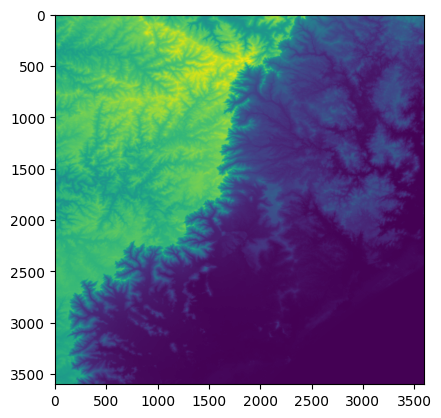

In [22]:
# Visualizing data.

dem_file = rasterio.open(r'C:\Users\Fernando\pythonGeoPandas\Copernicus_DSM_COG_10_S29_00_W050_00_DEM.tif')
dem_band1 = dem_file.read(1)

pyplot.imshow(dem_band1)

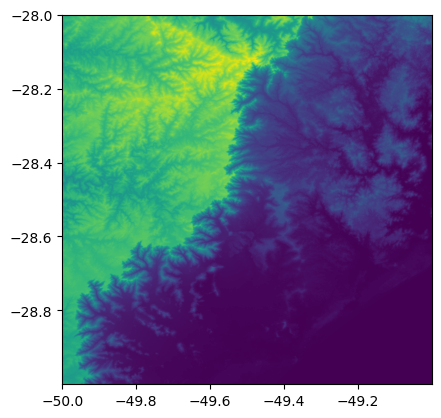

<Axes: >

In [23]:
from rasterio.plot import show
show(dem_band1, transform = dem_file.transform)

### Obtendo dados de Sentinel usando Earth Search (sentinel-2-l2a)

In [24]:
catalog2 = pystac_client.Client.open('https://earth-search.aws.element84.com/v1')

In [25]:
col2 = catalog2.get_collections()
for i in col2:
    print(f"- {i.id}")

- cop-dem-glo-30
- naip
- sentinel-2-l2a
- sentinel-2-l1c
- cop-dem-glo-90
- landsat-c2-l2
- sentinel-1-grd
- sentinel-2-c1-l2a


In [26]:
search2 = catalog2.search(
    max_items=10,
    collections=['sentinel-2-l2a'],
    bbox=[-49.470793, -28.830164, -49.238487, -28.635795], # Criciúma
    datetime=['2023-01-01T00:00:00Z', '2024-01-01T00:00:00Z'],
    query={"eo:cloud_cover":{"lt":0.1}},
)
print(f"{search2.matched()} items found")

4 items found


In [27]:
for item in search2.items():
    print(item.id)

S2B_22JFP_20230916_0_L2A
S2B_22JFP_20230817_0_L2A
S2A_22JFP_20230802_0_L2A
S2A_22JFP_20230213_0_L2A


In [29]:
item_collection2 = search2.item_collection()
#item_collection.save_object(r'C:\Users\Fernando\pythonGeoPandas\my_itemcollection.json')
dt_dict2 = item_collection2.to_dict()

dt_dict2

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'stac_version': '1.0.0',
   'id': 'S2B_22JFP_20230916_0_L2A',
   'properties': {'created': '2023-09-16T22:45:05.745Z',
    'platform': 'sentinel-2b',
    'constellation': 'sentinel-2',
    'instruments': ['msi'],
    'eo:cloud_cover': 0.022694,
    'proj:epsg': 32722,
    'mgrs:utm_zone': 22,
    'mgrs:latitude_band': 'J',
    'mgrs:grid_square': 'FP',
    'grid:code': 'MGRS-22JFP',
    'view:sun_azimuth': 42.5233026007763,
    'view:sun_elevation': 50.3659530739797,
    's2:degraded_msi_data_percentage': 0.0002,
    's2:nodata_pixel_percentage': 3e-06,
    's2:saturated_defective_pixel_percentage': 0,
    's2:dark_features_percentage': 0.234293,
    's2:cloud_shadow_percentage': 0,
    's2:vegetation_percentage': 73.156744,
    's2:not_vegetated_percentage': 11.812834,
    's2:water_percentage': 12.862591,
    's2:unclassified_percentage': 1.91084,
    's2:medium_proba_clouds_percentage': 0.019993,
    's2:high_proba_c

In [50]:
for j in range(0, search2.matched()):
    print(j, '-', dt_dict2['features'][j]['id'])

for j in ['blue', 'red', 'green']:
    url = dt_dict2['features'][2]['assets'][j]['href']
    id = dt_dict2['features'][2]['id']
    filename = id + '_' + j + '.tif'
    
    urlretrieve(url, 'C:\\Users\\Fernando\\pythonGeoPandas\\' + filename)

0 - S2B_22JFP_20230916_0_L2A
1 - S2B_22JFP_20230817_0_L2A
2 - S2A_22JFP_20230802_0_L2A
3 - S2A_22JFP_20230213_0_L2A


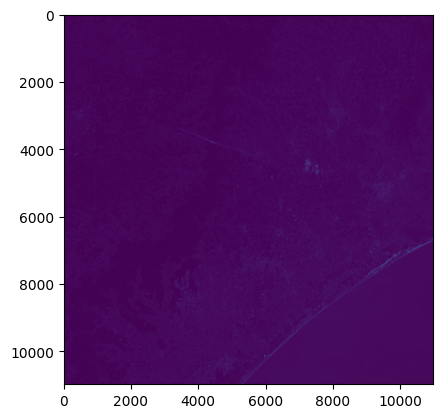

In [57]:
s2_file = rasterio.open(r'C:\Users\Fernando\pythonGeoPandas\S2A_22JFP_20230802_0_L2A_blue.tiff')
s2_blue = s2_file.read(1)

pyplot.imshow(s2_blue)

# Obtendo dados de Sentinel usando Brazil Data Cube ()

In [2]:
catalog3 = pystac_client.Client.open('https://brazildatacube.dpi.inpe.br/stac/', dict(access_token='change-me'))

C:\Users\Fernando\.conda\envs\modflow\Lib\site-packages\pystac_client\client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


In [3]:
obter_coll(catalog3)

C:\Users\Fernando\.conda\envs\modflow\Lib\site-packages\pystac_client\client.py:436: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")
C:\Users\Fernando\.conda\envs\modflow\Lib\site-packages\pystac\collection.py:696: DeprecatedWarning: The collection 'S2-SEN2COR_10_16D_STK-1' is deprecated.
  warnings.warn(


['MOSAIC-S2-YANOMAMI-6M-1',
 'CB4-MOSAIC-BRAZIL_64_3M_STK-1',
 'MYD13Q1-6',
 'LANDSAT-MOZ_30_1M_STK-1',
 'LCC_L8_30_16D_STK_Amazonia-TC-1',
 'LCC_S2_10_1M_STK_PA-SPC-AC-NA-1',
 'CB4A-MOSAIC-PARAIBA_55_3M_STK-1',
 'S2-MOSAIC-PARAIBA_10_3M_STK-1',
 'LCC_C4_64_1M_STK_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_MT_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_MT_RF_PA-SPC-AC-NA-1',
 'LC8-MOSAIC-BRAZIL_30_6M_MEDSTK-1',
 'LCC_L8_30_1M_STK_Cerrado-1',
 'S2-SEN2COR_10_16D_STK-1',
 'LCC_S2_10_16D_STK_Amazonia-1',
 'LCC_L8_30_1M_STK_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1',
 'MOD13Q1-6',
 'KD_S2_20M_VISBANDS_CURUAI-1',
 'LCC_L8_30_16D_STK_Pantanal-1',
 'MOSAIC-S2-CERRADO-4M-1',
 'MOSAIC-S2-AMAZONIA-3M-1',
 'LCC_L8_30_16D_STK_Cerrado-1',
 'LC8_30_16D_STK-1',
 'LCC_L8_30_16D_STK_Caatinga-1',
 'LCC_L8_30_16D_STK_MataAtlantica-1',
 'LCC_L8_30_16D_STK_Pampa-1',
 'S2-16D-2',
 'CB4-16D-2',
 'S2_L2A-1',
 'S2-16D-PERU-1',
 'LANDSAT-16D-PERU-1',
 'LANDSAT-16D-COLOMBIA-1',
 'CB4MUX-2M-1',
 'S2-16D-COLOMBIA-1',

In [9]:
catalog3.get_conforms_to() # empty list...

#search3 = catalog3.search(
#    max_items=10,
#    collections=['CB4MUX-2M-1'],
#    bbox=[-49.470793, -28.830164, -49.238487, -28.635795], # Criciúma
#    datetime=['2023-01-01T00:00:00Z', '2024-01-01T00:00:00Z']
#)
#print(f"{search3.matched()} items found")

[]

### Enviando dados para o banco de dados

In [3]:
import os
from subprocess import PIPE, Popen

In [9]:
base_path = r'C:\Users\Fernando\pythonGeoPandas'
filepath = os.path.join(base_path, "Copernicus_DSM_COG_10_S29_00_W050_00_DEM.tif")
command = 'raster2pgsql '+ filepath +' public.dem_file2 | psql -h localhost -d postgis_32_sample -U postgres -p'
print(command)

subprocess.call(command, shell=True) #requires to type password in the terminal.

raster2pgsql C:\Users\Fernando\pythonGeoPandas\Copernicus_DSM_COG_10_S29_00_W050_00_DEM.tif public.dem_file2 | psql -h localhost -d postgis_32_sample -U postgres


0